Import و مسیرها

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

project_root = Path.cwd().parent

proc_v2 = project_root / "data" / "processed" / "v2"
fig_dir = project_root / "reports" / "figures"
ans_dir = project_root / "reports" / "answers"

fig_dir.mkdir(parents=True, exist_ok=True)
ans_dir.mkdir(parents=True, exist_ok=True)

# Style
sns.set(style="whitegrid", font="Tahoma", palette="Set2")

match_fp = proc_v2 / "match_clean_v2.parquet"
df_match = pd.read_parquet(match_fp)

print("project_root:", project_root)
print("Loaded from:", match_fp)
print("Shape:", df_match.shape)


project_root: c:\Users\mit\Desktop\Finaaal
Loaded from: c:\Users\mit\Desktop\Finaaal\data\processed\v2\match_clean_v2.parquet
Shape: (16873, 64)


پردازش داده

In [2]:
# Convert start_datetime (unix) to datetime
df_match["start_date"] = pd.to_datetime(
    df_match["start_datetime"], unit="s", errors="coerce"
)

# Count matches per month
matches_per_month = (
    df_match.groupby(df_match["start_date"].dt.to_period("M"))
    .size()
    .reset_index(name="num_matches")
)

# Convert Period to timestamp for plotting
matches_per_month["start_date"] = matches_per_month["start_date"].dt.to_timestamp()

# Save table
matches_per_month.to_csv(ans_dir / "q_new2_trend_matches.csv", index=False, encoding="utf-8-sig")
print("Saved table to reports/answers/q_new2_trend_matches.csv")

matches_per_month.head()


Saved table to reports/answers/q_new2_trend_matches.csv


,start_date,num_matches
0,2024-01-01,81
1,2024-02-01,7371
2,2024-03-01,9155
3,2024-04-01,266


نمودار

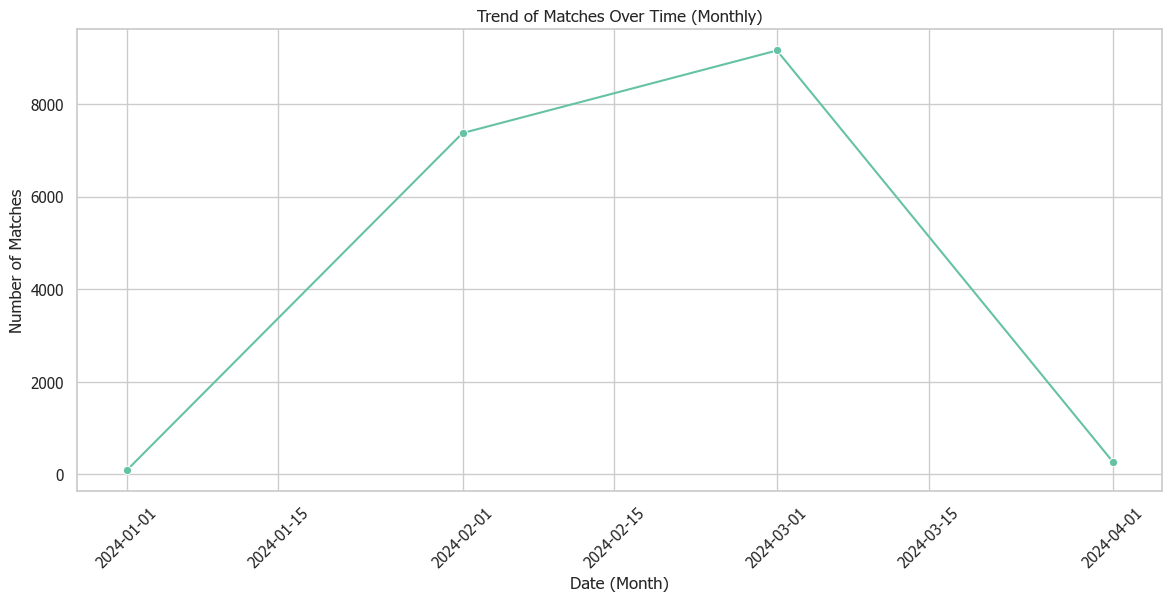

In [3]:
plt.figure(figsize=(14,6))
sns.lineplot(data=matches_per_month, x="start_date", y="num_matches", marker="o")
plt.xlabel("Date (Month)")
plt.ylabel("Number of Matches")
plt.title("Trend of Matches Over Time (Monthly)")
plt.xticks(rotation=45)
plt.savefig(fig_dir / "q_new2_trend_matches.png", dpi=300, bbox_inches="tight")
plt.show()
